In [ ]:
!pip install easyocr
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30
import easyocr
import skimage
import difflib as dl
import string
from PIL import Image

Found existing installation: opencv-python-headless 4.1.2.30
Uninstalling opencv-python-headless-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
Proceed (y/n)? y
  Successfully uninstalled opencv-python-headless-4.1.2.30
  Using cached opencv_python_headless-4.1.2.30-cp37-cp37m-manylinux1_x86_64.whl (21.8 MB)


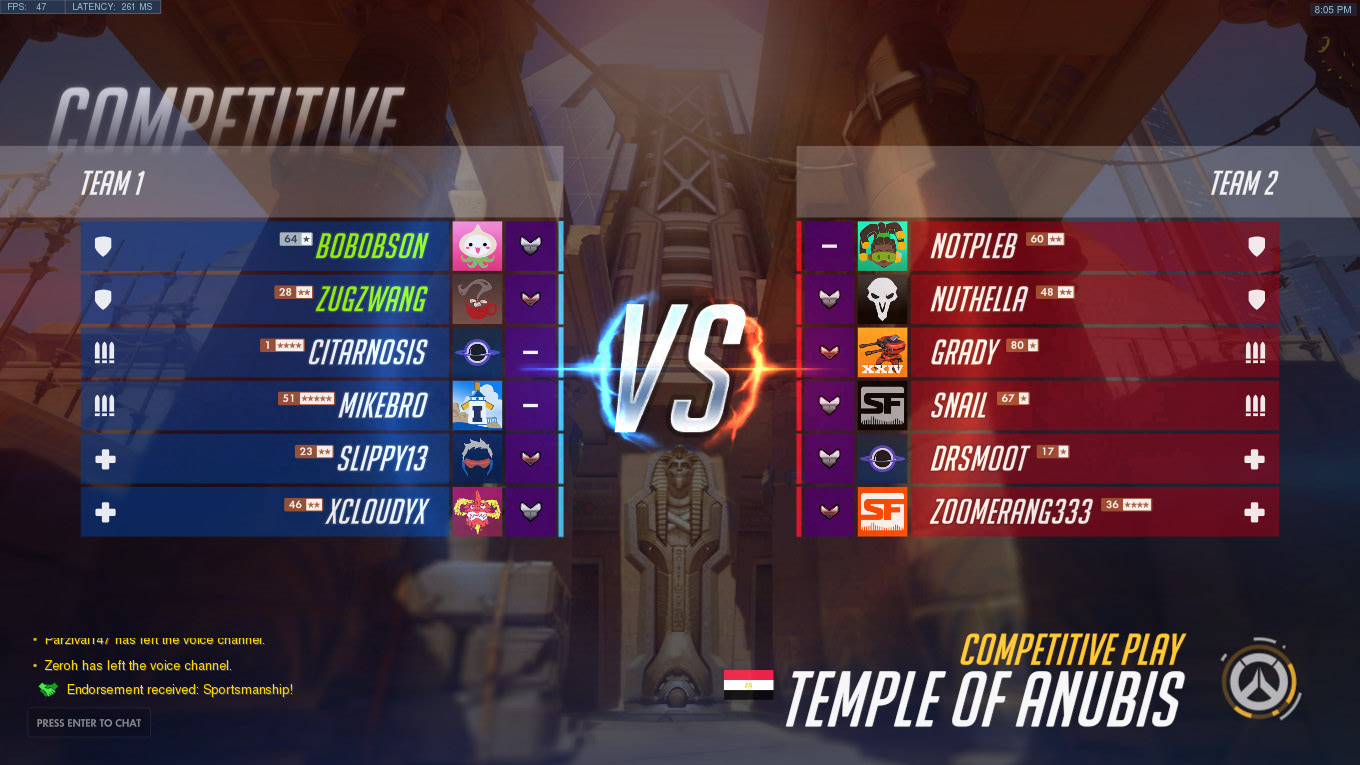

In [ ]:
# Inputs image from a local path. Displaying it and saving it's width and height values. Also includes the tolerance which is a ratio parameter which is used for determinig if a recognized string is too small or not.

path1 = '/content/ScreenShot_22-03-23_20-05-08-000.jpg'

img = Image.open(path1)
display(img)

width, height = img.size
tolerance = 0.03


In [ ]:
#Chooses which language easyocr is going to detect

reader = easyocr.Reader(lang_list=['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
ocr_deatailed = reader.readtext(path1, detail = 1)
ocr_simple = reader.readtext(path1, detail = 0)

In [ ]:
 #These two are used for bug testing in case something goes wrong.

 print(ocr_deatailed)

[([[71, 1], [155, 1], [155, 13], [71, 13]], 'LATENCY: 261 Ms', 0.5647778706533879), ([[1313, 3], [1355, 3], [1355, 17], [1313, 17]], '8.05 PM', 0.490137274755676), ([[50, 75], [413, 75], [413, 155], [50, 155]], 'COMPETITIVE', 0.6575705557211345), ([[75, 165], [149, 165], [149, 201], [75, 201]], 'TEAM 1', 0.9963822786428989), ([[1205, 165], [1283, 165], [1283, 201], [1205, 201]], 'TEAM 2', 0.9966568295055753), ([[1029, 233], [1065, 233], [1065, 247], [1029, 247]], '60 ', 0.9766635298728943), ([[313, 227], [435, 227], [435, 265], [313, 265]], 'BOBOBSON', 0.9988297197761977), ([[927, 227], [1025, 227], [1025, 265], [927, 265]], 'NOTPLEb', 0.5181029000721635), ([[277, 285], [315, 285], [315, 301], [277, 301]], '28 E', 0.6362146850969009), ([[310, 280], [432, 280], [432, 316], [310, 316]], "'ZUGZWANG", 0.9670730431084589), ([[927, 280], [1033, 280], [1033, 316], [927, 316]], 'NUTHELLA', 0.9903401361174663), ([[301, 331], [433, 331], [433, 371], [301, 371]], "'CITARNOSIS", 0.7292182321099483

In [ ]:
print(ocr_simple)

['LATENCY: 261 Ms', '8.05 PM', 'COMPETITIVE', 'TEAM 1', 'TEAM 2', '60 ', 'BOBOBSON', 'NOTPLEb', '28 E', "'ZUGZWANG", 'NUTHELLA', "'CITARNOSIS", 'GRADY', '80 4', 'VS', 'IXIV', "'MIKEBRO", 'SNAIL', '23 M4', "'SLIPPYI3", 'DRSMOOT', '46 @d', "'XCLOUDYX", 'ZOOMERANG333', 'Falzwvan4', 'Tas IEI[ Ine voice cnannel:', 'Zeroh has left the voice channel.', 'COMPETITIVE PLAY', 'Endorsement received: Sportsmanshipl', 'PRESS ENTER TO CHAT', 'TEMPLE OF ANUBIS']


In [ ]:
# Removes everything that is small and low 

def removal(detailed):
  return [y for y in detailed if (y[0][2][1] - y[0][1][1]) / height > tolerance and y[-1] > 0.1 and len(y[1]) > 2]


In [ ]:
# This function remnoves all elements before 'TEAM 1' since it was determined that none of those elements matter

def removal2(simple):
   team1 = next(x for x in simple if x.lower() == 'team 1')
   index = simple.index(team1)
   return simple[index:]

In [ ]:
# Makes the scary list nice :)

def trim(detailed):
  return [x[1] for x in detailed]

In [ ]:
# This is a list of all maps in OW comp

OW_mapnames = ["Busan", "Ilios", "Lijiang Tower", "Nepal", "Oasis", "Hanamura", "Temple of Anubis", "Volskaya Industries", "Dorado", "Havana", "Junkertown", "Rialto", "Route 66", "Watchpoint: Gibraltar", "Blizzard World", "Eichenwalde", "Hollywood", "King's Row", "Numbani"]
mapList = [x.lower() for x in OW_mapnames]


In [ ]:
#Finds the map on which the comp game was played.

def map_finder(simple):

  possible_maps = [dl.get_close_matches(i.lower(), mapList, 1, 0.5) for i in simple]
  flat_list = [item for sublist in possible_maps for item in sublist]

  #print(flat_list)
  #print(possible_maps)

  return flat_list[-1]
    
    

In [ ]:
# Finds the names of the people who played the game
def find_teammates(simple):
  team1 = []
  team2 = []


  start_str = next(x for x in simple if x.lower() == 'team 2')
  index = simple.index(start_str) + 1

  for x in range (0, 12):
    if x % 2 == 0:
      team1.append(simple[index + x])
    else:
      team2.append(simple[index + x])
  
  return team1, team2

In [ ]:
def find_SR(detailed):

  start_str = next(x for x in detailed if x[1].lower() == 'team 1')
  end_str = next(x for x in detailed if x[1].lower() == 'team 2')

  index_start = detailed.index(start_str)
  index_end = detailed.index(end_str)

  sr = []

  num = index_end - index_start

  if num == 1:
    return '0', '0'
  
  if num == 3:
    return detailed[index_start + 1][1], scary[index_end - 1][1]

  if detailed[index_start + 1][0][0][0]/width < 1/2:
    return detailed[index_start + 1][1], '0'

  else: 
    return '0', detailed[index_start + 1][1]

  
  print('????')





In [ ]:
deatiled = removal(ocr_deatailed)
map = map_finder(ocr_simple)
simple = trim(deatiled)
simple
map

'temple of anubis'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
find_teammates(simple.copy())

(['BOBOBSON',
  "'ZUGZWANG",
  "'CITARNOSIS",
  "'MIKEBRO",
  "'SLIPPYI3",
  "'XCLOUDYX"],
 ['NOTPLEb', 'NUTHELLA', 'GRADY', 'SNAIL', 'DRSMOOT', 'ZOOMERANG333'])

In [ ]:
def show_SR(sr1, sr2):
  return int(sr1.strip(string.ascii_letters)), int(sr2.strip(string.ascii_letters))

In [ ]:
sr1, sr2 = find_SR(deatiled)

In [ ]:
show_SR(sr1, sr2)

(0, 0)